# Adult Cencus Income Classification

The Goal is to predict whether a person has an income of more than 50K a year or not.

This is basically a binary classification problem where a person is classified into the more than 50K group or less than or equal to 50K group

The dataset contains about 48842 rows and 15 features which after all the implementation of all standard techniques like Data Cleaning, Feature Engineering was feeded to our Classifier for training and testing.

# Importing required libraries

In [1]:
import os
import csv
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Ignoring warnings
import warnings 
warnings.filterwarnings(action='ignore')

# Extracting Data From UCI

In [2]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [3]:
from ucimlrepo import fetch_ucirepo 

In [4]:
# Fetch dataset 
uci_data = fetch_ucirepo(id=20) 

In [5]:
uci_data

{'data': {'ids': None,
  'features':        age         workclass  fnlwgt  education  education-num  \
  0       39         State-gov   77516  Bachelors             13   
  1       50  Self-emp-not-inc   83311  Bachelors             13   
  2       38           Private  215646    HS-grad              9   
  3       53           Private  234721       11th              7   
  4       28           Private  338409  Bachelors             13   
  ...    ...               ...     ...        ...            ...   
  48837   39           Private  215419  Bachelors             13   
  48838   64               NaN  321403    HS-grad              9   
  48839   38           Private  374983  Bachelors             13   
  48840   44           Private   83891  Bachelors             13   
  48841   35      Self-emp-inc  182148  Bachelors             13   
  
             marital-status         occupation    relationship  \
  0           Never-married       Adm-clerical   Not-in-family   
  1      Marri

# Check if the file already exists

In [6]:
if os.path.exists('census_income.csv'):
    data = uci_data['data']['original']
    data.to_csv('census_income.csv', index=False, mode='w')
else:
    data = uci_data['data']['original']
    data.to_csv('census_income.csv', index=False)

In [7]:
df = pd.read_csv('census_income.csv')

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Step 1: Preliminary Analysis

## Number of independent and dependent variables:

In [9]:
independent_vars = df.columns[:-1]
dependent_var = df.columns[-1]
print("Number of independent variables:", len(independent_vars))
print("Number of dependent variables:", 1)

Number of independent variables: 14
Number of dependent variables: 1


## Number of records:

In [10]:
print("Number of records:", len(df))

Number of records: 48842


In [11]:
df.shape

(48842, 15)

## Categorical Features

In [12]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'income']

In [13]:
for feature in categorical_features:
    print("The feature is {} and the number of categories are {}".format(feature,len(df[feature].unique())))

The feature is workclass and the number of categories are 10
The feature is education and the number of categories are 16
The feature is marital-status and the number of categories are 7
The feature is occupation and the number of categories are 16
The feature is relationship and the number of categories are 6
The feature is race and the number of categories are 5
The feature is sex and the number of categories are 2
The feature is native-country and the number of categories are 43
The feature is income and the number of categories are 4


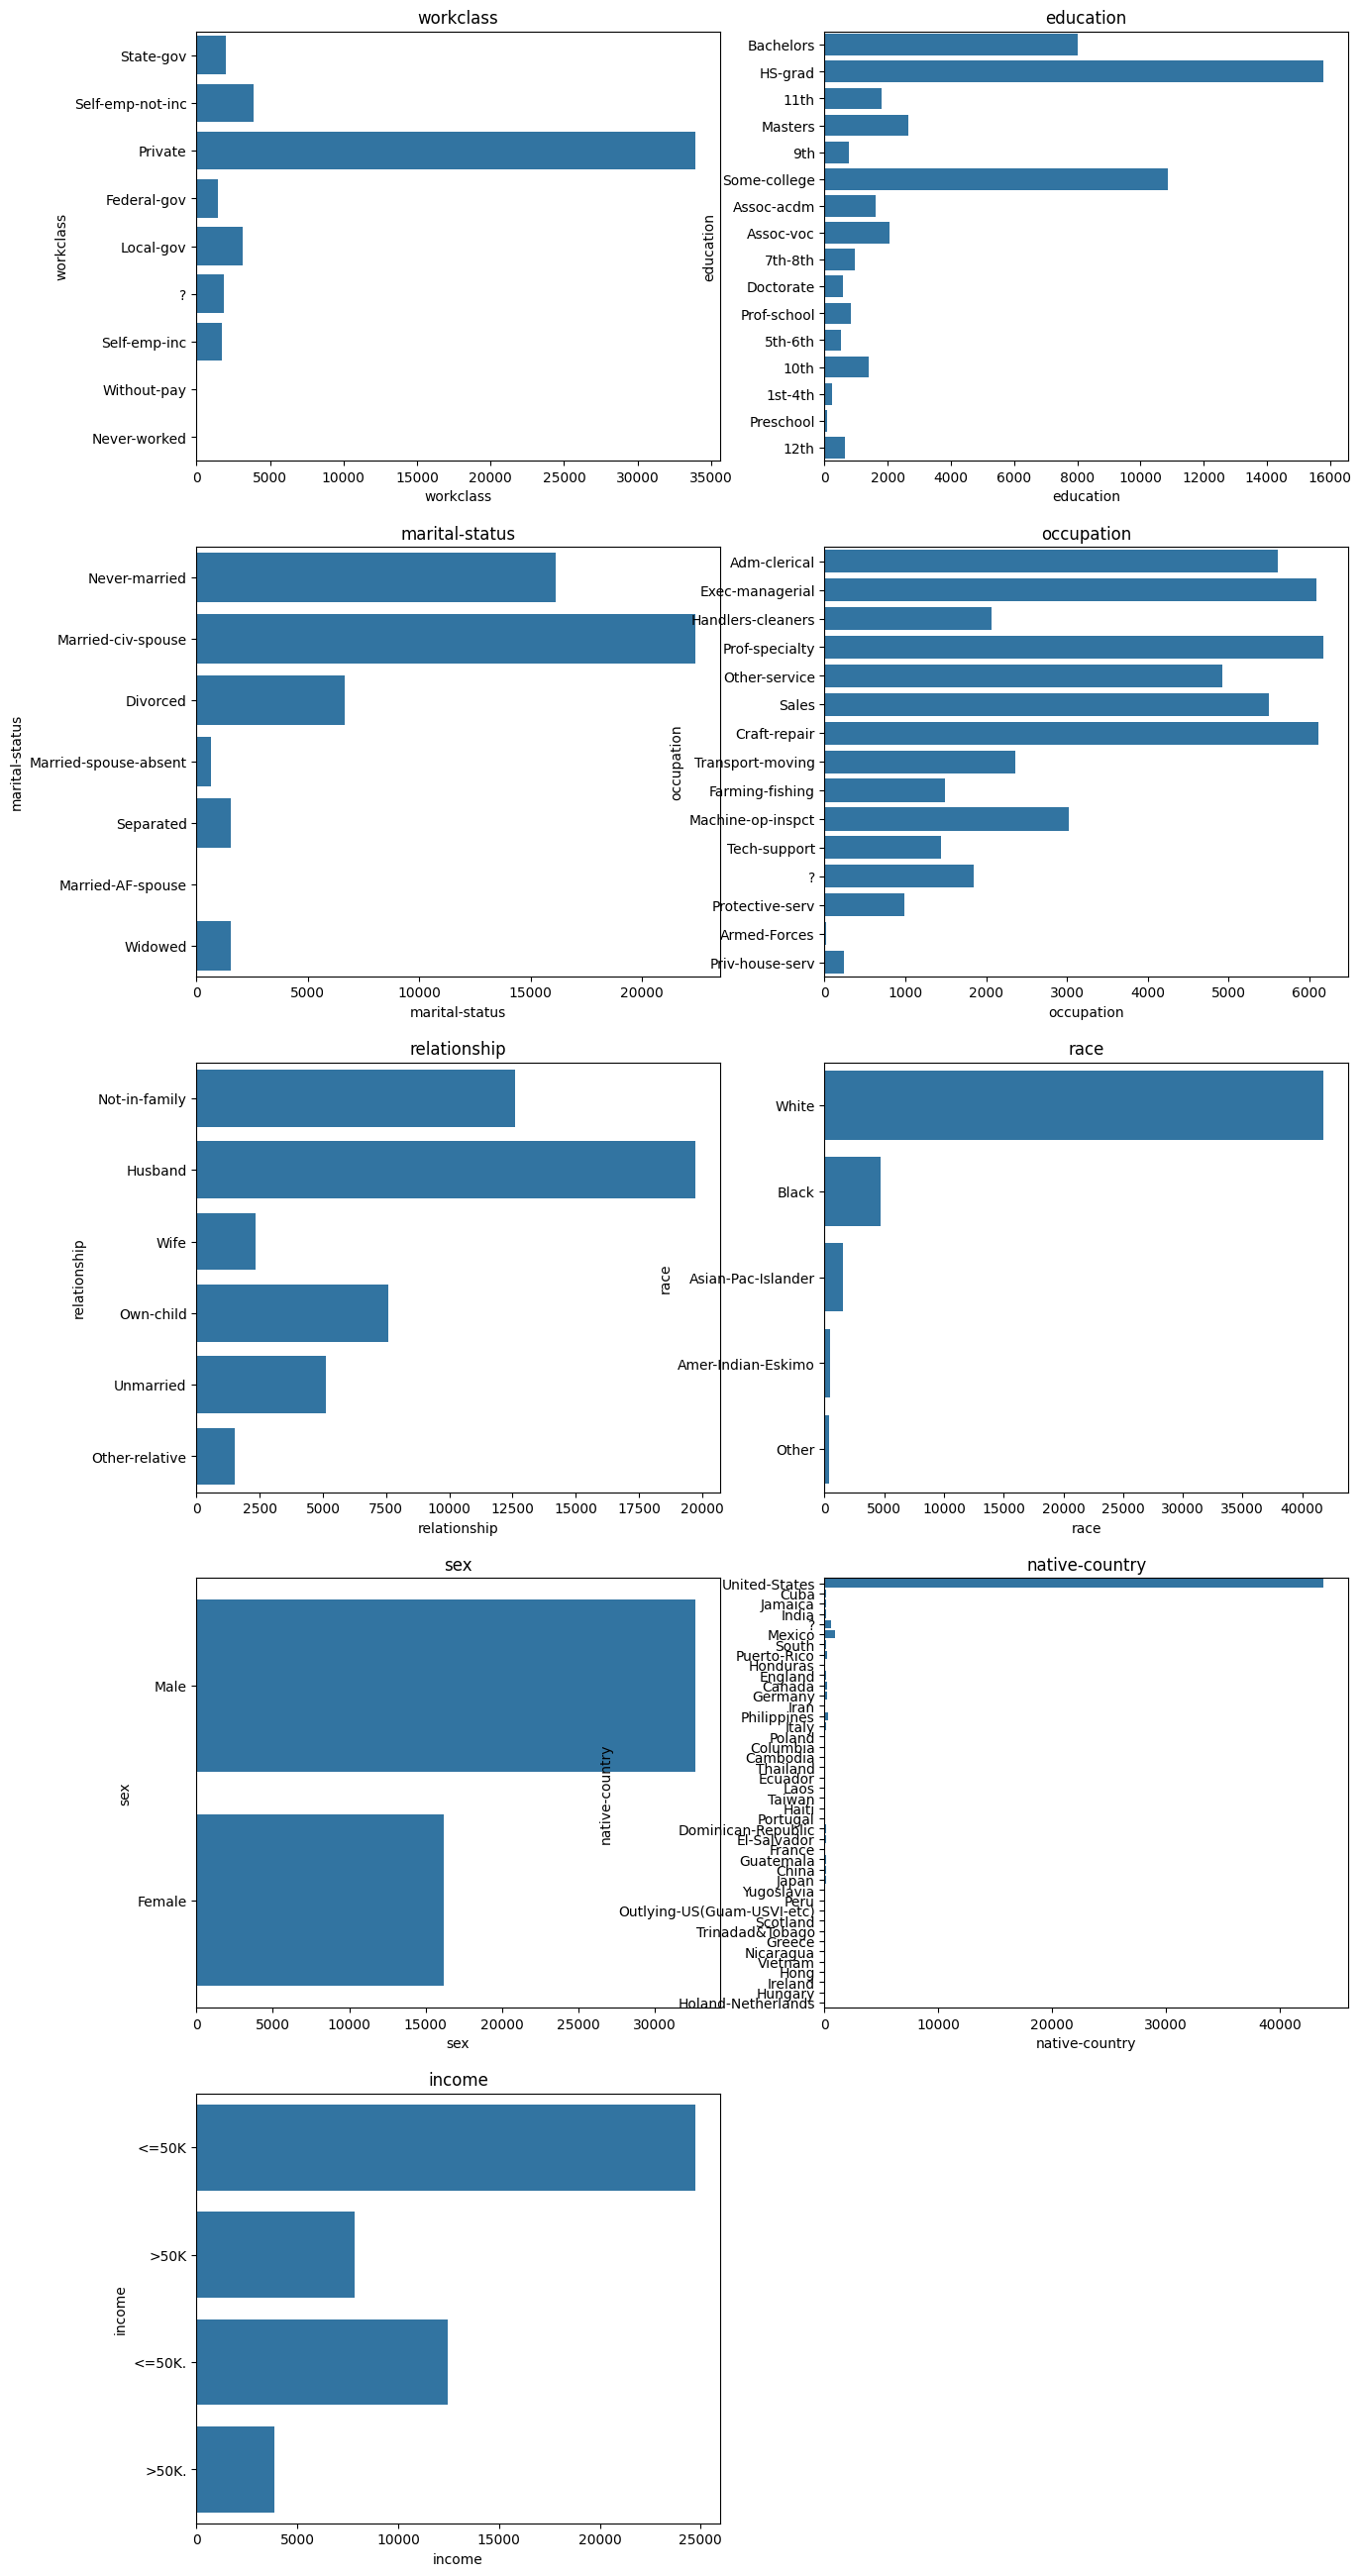

In [14]:
plt.figure(figsize=(15,80),facecolor='white')
plotnumber=1
for categorical_feature in categorical_features:
    ax=plt.subplot(12,2,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

## Numerical Features

In [15]:
numerical_features = [feature for feature in df.columns if df[feature].dtype in ['int64', 'float64']]
numerical_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [16]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print("Number of numerical variable",len(numerical_features))
df[numerical_features].head()

Number of numerical variable 6


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [17]:
discrete_features=[feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete variables count():{}".format(len(discrete_features)))

Discrete variables count():1


In [18]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+['y']]
print("Continuous feature count {}".format(len(continuous_features)))

Continuous feature count 5


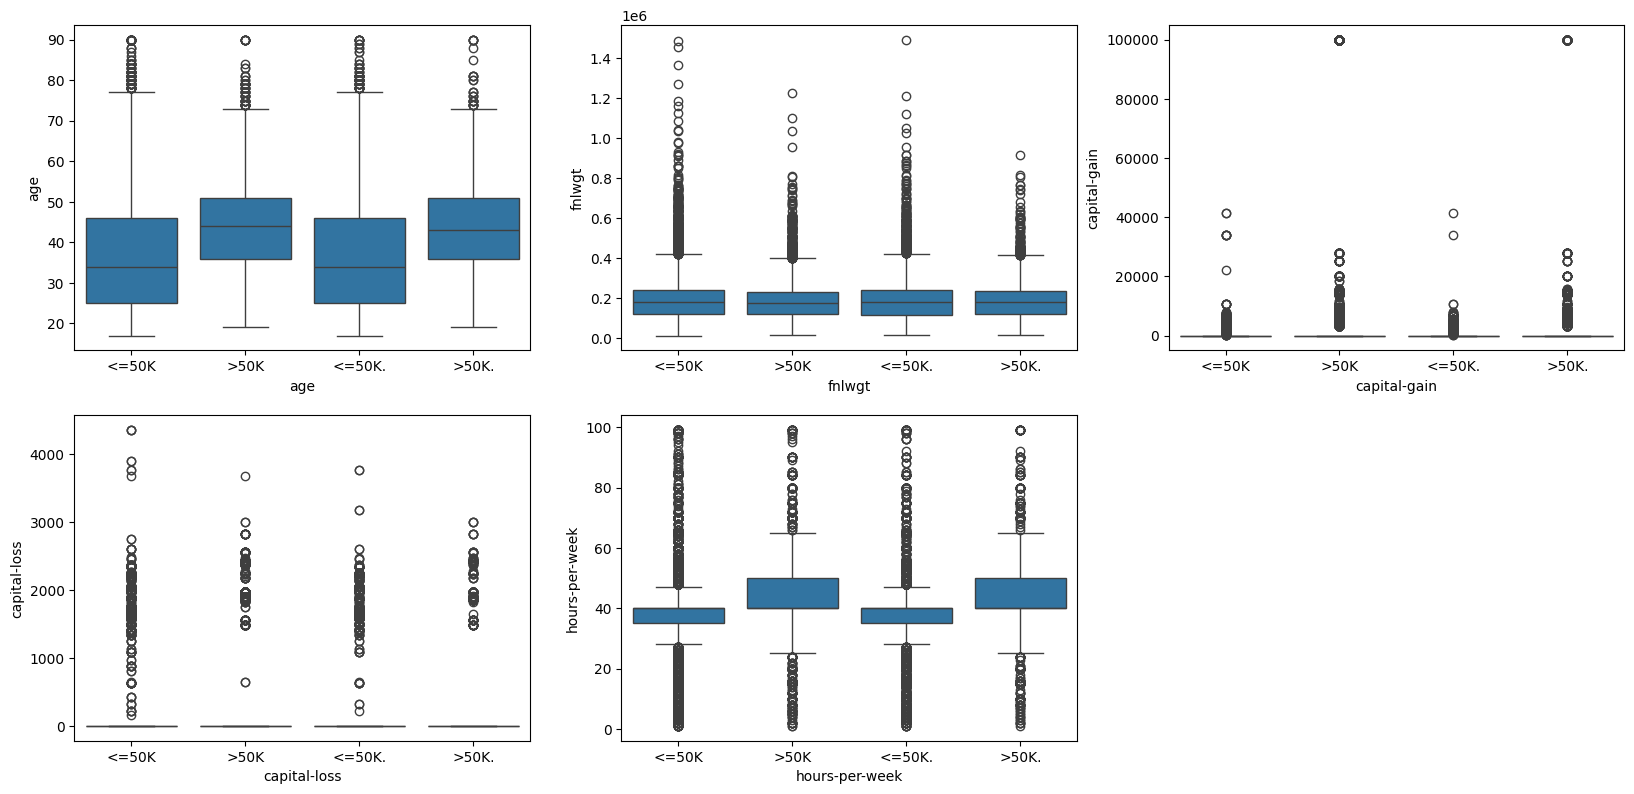

In [19]:
plt.figure(figsize=(20,60),facecolor='white')
plotnumber=1
for feature in continuous_features:
    ax=plt.subplot(12,3,plotnumber)
    sns.boxplot(x='income',y=df[feature],data=df)
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

## Data types of variables:

In [20]:
print("Data types of variables:")
print(df.dtypes)

Data types of variables:
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [21]:
for col in df.columns:
    if df[col].nunique() == 2:
        print(f"{col} might be binary")

sex might be binary


## Summary Statistics

In [25]:
# Display summary statistics for the whole dataframe
df.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,48842.000000,47879,4.884200e+04,48842,48842.000000,48842,47876,48842,48842,48842,48842.000000,48842.000000,48842.000000,48568,48842
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,4
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33906,NaN,15784,NaN,22379,6172,19716,41762,32650,NaN,NaN,NaN,43832,24720
mean,38.643585,NaN,1.896641e+05,NaN,10.078089,NaN,NaN,NaN,NaN,NaN,1079.067626,87.502314,40.422382,NaN,NaN
std,13.710510,NaN,1.056040e+05,NaN,2.570973,NaN,NaN,NaN,NaN,NaN,7452.019058,403.004552,12.391444,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.175505e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.781445e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.376420e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [26]:
# Display summary statistics for only numeric values in dataframe
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Step 2: Data Cleaning

In [27]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [28]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [29]:
df.nunique()

age                  74
workclass             9
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       42
income                4
dtype: int64

In [30]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

## Checking for low variance:

In [31]:
# Checking for columns with a single unique value
low_variance_cols = [col for col in df.columns if df[col].nunique() <= 1]
print("Columns with low variance (possible candidates for removal):", low_variance_cols)

Columns with low variance (possible candidates for removal): []


## Remove Duplicates

In [32]:
# Checking for duplicates
if df.duplicated().any():
    print("Duplicates found:", df.duplicated().sum())
    df = df.drop_duplicates()
    print("Duplicates have been removed.")
else:
    print("No duplicates found.")

Duplicates found: 29
Duplicates have been removed.


## Handling Missing Values

In [33]:
# Checking for missing values in all columns
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0]

if not missing_data.empty:
    print("Missing values found in the following columns:")
    print(missing_data)
    # Handling missing values (example using median imputation for numerical columns)
    for column in df.columns:
        if df[column].dtype == np.number:
            df[column].fillna(df[column].median(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)  # For categorical data, using mode
    print("Missing values have been handled.")
else:
    print("No missing values found.")

Missing values found in the following columns:
workclass         963
occupation        966
native-country    274
dtype: int64
Missing values have been handled.


## Unique counts of categories in columns

In [34]:
df['workclass'].value_counts()

workclass
Private             34842
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [35]:
df['occupation'].value_counts()

occupation
Prof-specialty       7133
Craft-repair         6107
Exec-managerial      6084
Adm-clerical         5608
Sales                5504
Other-service        4919
Machine-op-inspct    3019
Transport-moving     2355
Handlers-cleaners    2071
?                    1843
Farming-fishing      1487
Tech-support         1445
Protective-serv       983
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [36]:
df['native-country'].value_counts()

native-country
United-States                 44084
Mexico                          947
?                               582
Philippines                     295
Germany                         206
Puerto-Rico                     184
Canada                          182
El-Salvador                     155
India                           151
Cuba                            138
England                         127
China                           122
South                           115
Jamaica                         106
Italy                           105
Dominican-Republic              103
Japan                            92
Poland                           87
Guatemala                        86
Vietnam                          86
Columbia                         85
Haiti                            75
Portugal                         67
Taiwan                           65
Iran                             59
Greece                           49
Nicaragua                        49
Peru         

In [37]:
df['marital-status'].value_counts()

marital-status
Married-civ-spouse       22372
Never-married            16098
Divorced                  6630
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: count, dtype: int64

In [38]:
df['sex'].value_counts()

sex
Male      32631
Female    16182
Name: count, dtype: int64

In [39]:
df['race'].value_counts()

race
White                 41736
Black                  4683
Asian-Pac-Islander     1518
Amer-Indian-Eskimo      470
Other                   406
Name: count, dtype: int64

In [40]:
df['education'].value_counts()

education
HS-grad         15777
Some-college    10869
Bachelors        8020
Masters          2656
Assoc-voc        2060
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           954
Prof-school       834
9th               756
12th              656
Doctorate         594
5th-6th           508
1st-4th           245
Preschool          82
Name: count, dtype: int64

In [41]:
df['income'].value_counts()

income
<=50K     24698
<=50K.    12430
>50K       7839
>50K.      3846
Name: count, dtype: int64

## Count ? as missing:

In [42]:
# Replacing '?' with NaN for accurate missing data handling
columns_with_question = ['workclass', 'occupation', 'native-country']
for column in columns_with_question:
    df[column] = df[column].replace('?', np.nan)

## Recalculate missing values after replacement

In [43]:
missing_data_updated = df.isnull().sum()
print("Updated missing values per column after '?' replacement:")
print(missing_data_updated)

Updated missing values per column after '?' replacement:
age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     582
income               0
dtype: int64


In [44]:
for column in columns_with_question:
    df[column].fillna(df[column].mode()[0], inplace=True)
print("Missing values have been filled with the most frequent value.")

Missing values have been filled with the most frequent value.


## Correcting Income Feature

In [45]:
# income
df.income = df.income.replace('<=50K.', '<=50K')
df.income = df.income.replace('>50K.', '>50K')

In [46]:
df['income'].value_counts()

income
<=50K    37128
>50K     11685
Name: count, dtype: int64

## Copy of Original Data

In [47]:
df_copy=df

In [48]:
print(df_copy.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object


In [49]:
df_copy.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Labeling the target variable

In [50]:
# income
df_copy.income = df_copy.income.replace('<=50K', 0)
df_copy.income = df_copy.income.replace('>50K', 1)

## Identify independent variables (all columns except 'income') and the dependent variable ('income')

In [51]:
X = df_copy.columns[:-1]  # Assuming 'income' is the last column
y = df_copy.columns[-1]

## Label Encoding

In [52]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [53]:
df1= df_copy.copy()
df1= df1.apply(LabelEncoder().fit_transform)
df1.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,6,3461,9,12,4,0,1,4,1,27,0,39,38,0
1,33,5,3788,9,12,2,3,0,4,1,0,0,12,38,0
2,21,3,18342,11,8,0,5,1,4,1,0,0,39,38,0
3,36,3,19995,1,6,2,5,0,2,1,0,0,39,38,0
4,11,3,25405,9,12,2,9,5,2,0,0,0,39,4,0


# Splitting data into training and testing sets

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X= df1.drop('income', axis=1)
y= df1['income']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the number of records in the training and testing data

In [57]:
print(f"Training records: {len(X_train)}, Testing records: {len(X_test)}")

Training records: 34169, Testing records: 14644


# Save training data to CSV

In [58]:
train_data = pd.concat([ pd.DataFrame(X_train),  pd.DataFrame(y_train)], axis=1)
train_data.to_csv('cencus_training_data.csv', index=False)
print("Training data has been saved to 'cencus_training_data.csv'.")

Training data has been saved to 'cencus_training_data.csv'.


# Save testing data to CSV

In [59]:
test_data = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], axis=1)
test_data.to_csv('cencus_testing_data.csv', index=False)
print("Testing data has been saved to 'cencus_testing_data.csv'.")

Testing data has been saved to 'cencus_testing_data.csv'.


# Feature Scaling

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()

In [62]:
X_train_scaled=scaler.fit_transform(X_train)

In [63]:
X_test_scaled=scaler.fit_transform(X_test)

# Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [65]:
# Initializing the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

In [66]:
# Fitting the model
model=log_reg.fit(X_train_scaled, y_train)

In [67]:
# Predict on the test data
model_predictions = model.predict(X_test_scaled)

In [68]:
print("Accuracy on training data: {:,.3f}".format(log_reg.score(X_train_scaled, y_train)))
print("Accuracy on test data: {:,.3f}".format(log_reg.score(X_test_scaled, y_test)))

Accuracy on training data: 0.823
Accuracy on test data: 0.824


In [69]:
from sklearn.metrics import accuracy_score, classification_report

In [70]:
# Evaluate the model
model_accuracy = accuracy_score(y_test, model_predictions)
print("Logistic Regression using sklearn Accuracy:", model_accuracy)
print("Classification Report of Logistic Regression using sklearn:\n", classification_report(y_test, model_predictions))

Logistic Regression using sklearn Accuracy: 0.8244332149685878
Classification Report of Logistic Regression using sklearn:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89     11078
           1       0.73      0.44      0.55      3566

    accuracy                           0.82     14644
   macro avg       0.79      0.70      0.72     14644
weighted avg       0.81      0.82      0.81     14644



##### The model accuracy is approximately 82.42%, which is a decent starting point 

### Class '0' : income <=50K

Precision: 0.84 - This indicates that 84% of the instances predicted as class 0 were actually class 0.

Recall: 0.95 - This indicates that the model captured 95% of actual class 0 instances.

f1-score: 0.89 - This is a high F1 score, which is a harmonic mean of precision and recall, indicating good performance for class 0.

Support: 11078 instances

### Class '1' : income >50K

Precision: 0.73 - This indicates that 73% of the instances predicted as class 1 were actually class 1.

Recall: 0.45 - This shows a relatively low value, meaning the model only captured 45% of actual class 1 instances.

f1-score: 0.55 - This score is moderately low, reflecting the low recall rate for class 1.

Support: 3566 instances

##### The support values indicate a significant class imbalance as there are more instances of class 0 than class 1

##### either oversampling the class '1' or undersampling the class '0' could be considered

## Random Forest

In [71]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Acc on training data: {:,.3f}".format(rfc.score(X_train_scaled, y_train)))
print("Acc on test data: {:,.3f}".format(rfc.score(X_test_scaled, y_test)))

Acc on training data: 0.762
Acc on test data: 0.756


In [72]:
# Evaluate Random Forest
print("Random Forest Accuracy:", accuracy_score(y_test, prediction1))
print("Random Forest Classification Report:\n", classification_report(y_test, prediction1))

Random Forest Accuracy: 0.8565282709642175
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91     11078
           1       0.75      0.62      0.68      3566

    accuracy                           0.86     14644
   macro avg       0.82      0.78      0.79     14644
weighted avg       0.85      0.86      0.85     14644



##### The overall accuracy of the Random Forest model is about 85.50%, which is an improvement over the Logistic Regression model

### Class '0' : income <=50K

Precision: 0.88 - A high value indicating that 88% of the predictions for class 0 are correct.

Recall: 0.93 - A high value showing that the model identifies 93% of all actual class 0 instances.

F1-Score: 0.91 - A strong score showing the balance between precision and recall.

Support: 11078 instances

### Class '1' : income >50K

Precision: 0.75 - Suggests that 75% of the model's class 1 predictions are correct.

Recall: 0.61 - Indicates the model identifies 61% of all actual class 1 instances, which is moderately good but could be improved.

F1-Score: 0.67 - Reflects a moderate balance between precision and recall for class 1.

Support: 3566  instances , indicating class imbalance similar to what was observed in the logistic regression model.

# Logistics Regression using Statsmodel

In [73]:
import statsmodels.api as sm

In [74]:
# Add intercept manually for Statsmodels which does not add it by default
X_train_scaled_sm = sm.add_constant(X_train_scaled)
X_test_scaled_sm = sm.add_constant(X_test_scaled)

In [75]:
# Initialize and fit the logistic regression model using Statsmodels
model = sm.Logit(y_train, X_train_scaled_sm)
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.385148
         Iterations 7


In [76]:
# Print the summary of the logistic regression model
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                34169
Model:                          Logit   Df Residuals:                    34154
Method:                           MLE   Df Model:                           14
Date:                Thu, 09 May 2024   Pseudo R-squ.:                  0.2976
Time:                        01:59:45   Log-Likelihood:                -13160.
converged:                       True   LL-Null:                       -18735.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0310      0.181    -38.769      0.000      -7.386      -6.676
x1             2.4694      0.096     25.751      0.000       2.281       2.657
x2            -0.6265      0.091     -6.877      0.0

In [77]:
# The prediction will be in terms of probabilities for the presence of the target class
predictions_prob = result.predict(X_test_scaled_sm)
predictions = np.where(predictions_prob < 0.5, 0, 1)  # Converting probabilities to binary outcomes

In [78]:
# Evaluating the model
model_accuracy = accuracy_score(y_test, predictions)
print("Logistic Regression using Statsmodel Accuracy:", model_accuracy)
print("Classification Report of Logistic Regression using Statsmodel:\n", classification_report(y_test, predictions))

Logistic Regression using Statsmodel Accuracy: 0.8242966402622235
Classification Report of Logistic Regression using Statsmodel:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89     11078
           1       0.73      0.45      0.55      3566

    accuracy                           0.82     14644
   macro avg       0.78      0.70      0.72     14644
weighted avg       0.81      0.82      0.81     14644



# XGBoost Random Forest Implementation

In [79]:
from xgboost import XGBRFClassifier

In [80]:
# Initialize the XGBoost Random Forest Classifier
xgbrf = XGBRFClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')

In [81]:
# Fit the model
model = xgbrf.fit(X_train_scaled, y_train)

In [82]:
# Predict on the training and test data
prediction_train = model.predict(X_train_scaled)
prediction_test = model.predict(X_test_scaled)

In [83]:
# Calculate accuracy on the training and test data
accuracy_train = accuracy_score(y_train, prediction_train)
accuracy_test = accuracy_score(y_test, prediction_test)

In [84]:
# Output the accuracy
print("Acc on training data: {:.3f}".format(accuracy_train))
print("Acc on test data: {:.3f}".format(accuracy_test))

Acc on training data: 0.856
Acc on test data: 0.858


In [85]:
# Evaluate Random Forest from XGBoost
print("Random Forest Accuracy:", accuracy_test)
print("Random Forest Classification Report:\n", classification_report(y_test, prediction_test))

Random Forest Accuracy: 0.8575525812619503
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     11078
           1       0.79      0.57      0.66      3566

    accuracy                           0.86     14644
   macro avg       0.83      0.76      0.78     14644
weighted avg       0.85      0.86      0.85     14644

